# Business Problem

Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. So in the givem problem we are trying to find out the factors on which churn depends so that on our analysis we can provide possible solution to the customer to tackel the situation.

# DataSet

In the given data set we have 4718 rows and 31 columns.

### Importig important Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from plotly.offline import iplot,download_plotlyjs,init_notebook_mode,plot
import chart_studio.plotly as pyc
import plotly as py
import plotly as tis
import cufflinks as cf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [4]:
Tele_comm_DF=pd.read_csv(r"F:\MLPacktPro\Customer-Churn-Prediction-main\Customer-Churn-Prediction-main\data\1\TelcoCustomerChurn.csv")

In [5]:
Tele_comm_DF

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0829-DDVLK,1.0,United States,California,Orange,92866.0,"33.784597, -117.844535",33.784597,-117.844535,Female,...,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0.0
4714,3230-JCNZS,1.0,United States,California,San Francisco,94107.0,"37.768881, -122.395521",37.768881,-122.395521,Female,...,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0.0
4715,7384-GHBPI,1.0,United States,California,San Dimas,91773.0,"34.102119, -117.815532",34.102119,-117.815532,Male,...,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1.0
4716,9254-RBFON,1.0,United States,California,Klamath River,96050.0,"41.816595, -122.948287",41.816595,-122.948287,Female,...,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1.0


In [6]:
Tele_comm_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

In [7]:
Tele_comm_DF[["Monthly Charges","Tenure Months","CLTV"]].describe()

,Monthly Charges,Tenure Months,CLTV
count,4714.000000,4704.000000,4692.000000
mean,64.885395,32.733418,4406.633205
std,30.140852,24.605091,1187.667229
min,18.250000,0.000000,2003.000000
25%,35.462500,9.000000,3477.500000
50%,70.375000,30.000000,4533.000000
75%,89.950000,56.000000,5402.250000
max,118.750000,72.000000,6499.000000


In [8]:
Tele_comm_DF.groupby(['Gender','Churn Value'])['Churn Value'].count()

Gender  Churn Value
Female  0.0            1671
        1.0             630
Male    0.0            1745
        1.0             627
Name: Churn Value, dtype: int64

In [9]:
Tele_comm_DF.groupby(['Senior Citizen','Churn Value'])['CLTV'].count()

Senior Citizen  Churn Value
No              0.0            2969
                1.0             947
Yes             0.0             432
                1.0             312
Name: CLTV, dtype: int64

In [10]:
Tele_comm_DF["Monthly Charges"].plot

In [11]:
df = pd.DataFrame(np.random.randn(100,3), columns = ['A', 'B', 'C'])
df.head()
df['A'] = df['A'].cumsum() + 20
df['B'] = df['B'].cumsum() + 20
df['C'] = df['C'].cumsum() + 20

### Converting Total Charges & Lat Long to a numerical data type.

In [12]:
        Tele_comm_DF["Lat Long"]= pd.to_numeric(Tele_comm_DF["Lat Long"], errors='coerce')

In [13]:
Tele_comm_DF["Total Charges"] = pd.to_numeric(Tele_comm_DF["Total Charges"], errors='coerce')

### Let's convert all the categorical variables into dummy variables

In [14]:
Tele_comm_DF_dummies = pd.get_dummies(Tele_comm_DF)
Tele_comm_DF_dummies.head()

,Count,Zip Code,Lat Long,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1.0,93446.0,NaN,35.634222,-120.728341,67.0,60.05,3994.05,6148.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,90005.0,NaN,34.059281,-118.307420,53.0,90.80,4921.20,5249.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,91963.0,NaN,32.619465,-116.593605,48.0,78.75,3682.45,2257.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,93551.0,NaN,34.613476,-118.256358,1.0,70.05,70.05,2469.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,95639.0,NaN,38.375325,-121.507935,57.0,74.30,4018.35,4133.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

f:\mlpacktpro\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '# of Customers by their tenure')

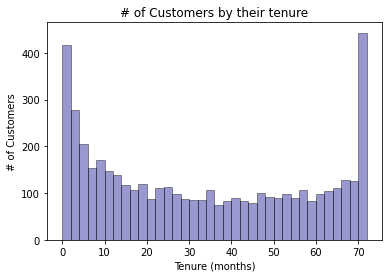

In [15]:
ax = sns.distplot(Tele_comm_DF['Tenure Months'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

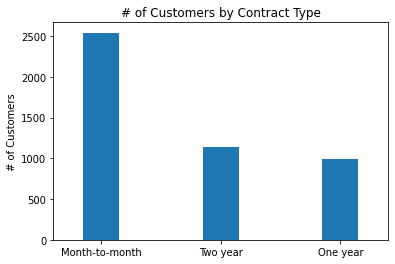

In [16]:
ax =Tele_comm_DF['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.



### Let us now look at the distribution of various services used by customers

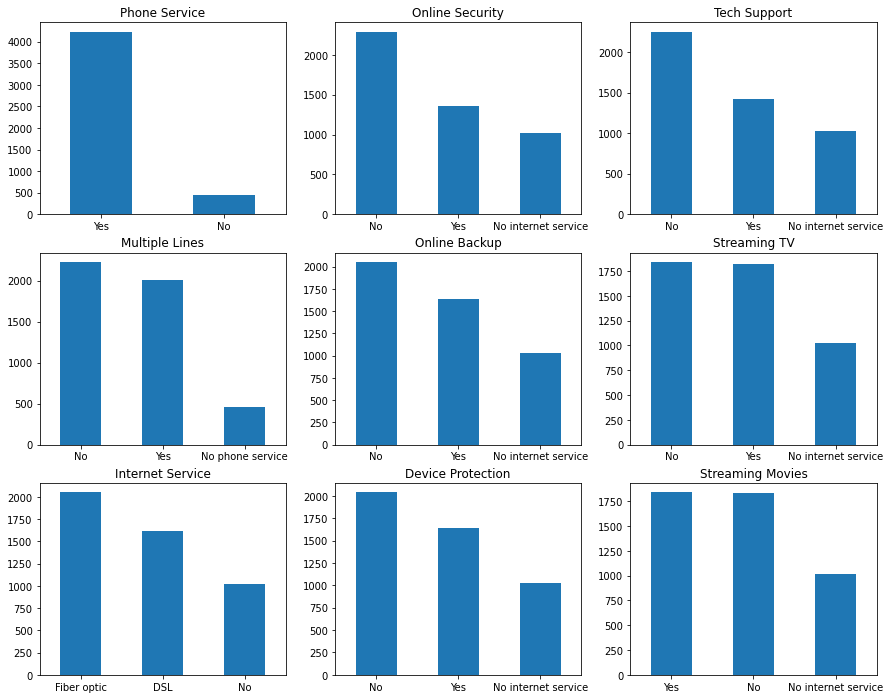

In [17]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Tele_comm_DF[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Tele_comm_DF[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Tele_comm_DF[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### Let's take a look at out  Churn Value and understand its interaction with other important variables .


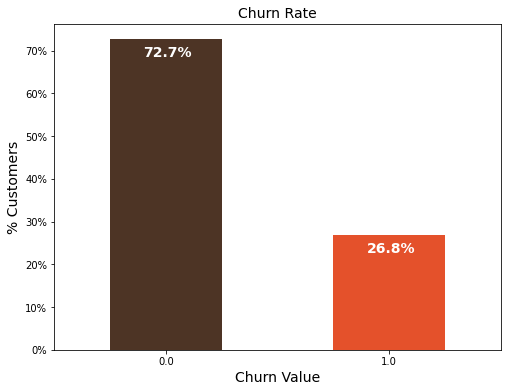

In [22]:
colors = ['#4D3425','#E4512B']
ax = (Tele_comm_DF['Churn Value'].value_counts()*100.0 /len(Tele_comm_DF)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn Value',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [24]:
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

#### Churn Value based on contract type

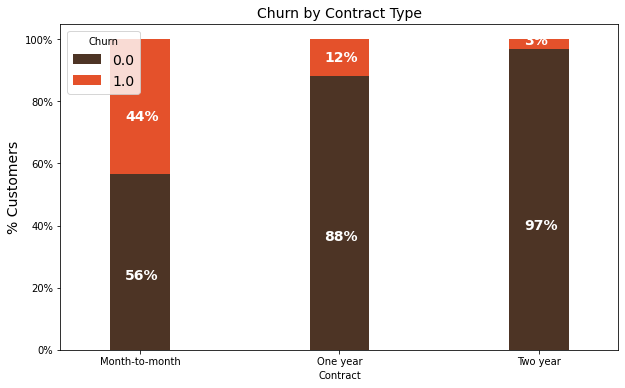

In [29]:
colors = ['#4D3425','#E4512B']
contract_churn =Tele_comm_DF.groupby(['Contract','Churn Value']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Churn Value based on Seniority Level

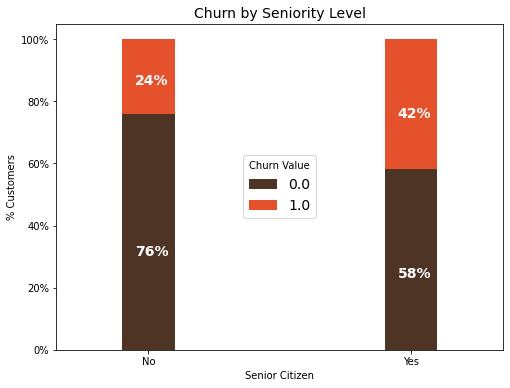

In [27]:
colors = ['#4D3425','#E4512B']
seniority_churn = Tele_comm_DF.groupby(['Senior Citizen','Churn Value']).size().unstack()
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn Value')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

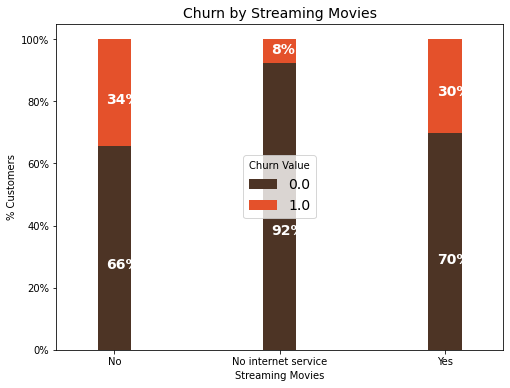

In [36]:
colors = ['#4D3425','#E4512B']
StreamMovie_churn = Tele_comm_DF.groupby(['Streaming Movies','Churn Value']).size().unstack()
ax = (StreamMovie_churn.T*100.0 / StreamMovie_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn Value')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Streaming Movies',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

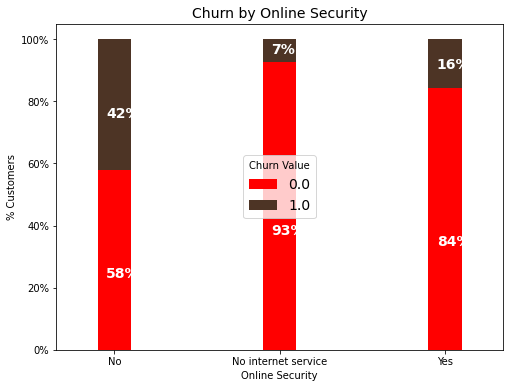

In [41]:
colors = ['#FF0000','#4D3425']
OnlineSecurity_churn = Tele_comm_DF.groupby(['Online Security','Churn Value']).size().unstack()
ax = (OnlineSecurity_churn.T*100.0 /OnlineSecurity_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn Value')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Online Security',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)